In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

datasets for training machine learning 
https://archive.ics.uci.edu/ml/datasets.html

In [2]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2019-01-31 11:25:03--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36,18K   133KB/s    in 0,3s    

2019-01-31 11:25:05 (133 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [4]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [6]:
df.shape

(1000, 12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b9ff7a320>]], dtype=object)

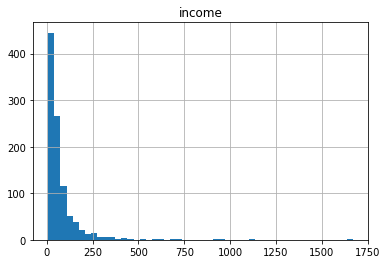

In [7]:
df.hist(column='income', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bb8ee1630>]], dtype=object)

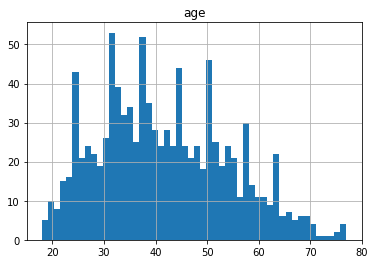

In [12]:
df.hist(column= 'age', bins = 50 )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bb8c79ef0>]], dtype=object)

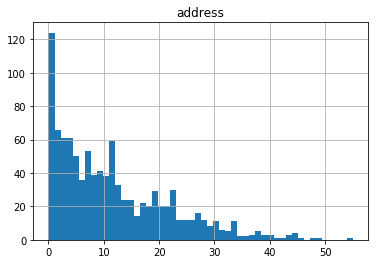

In [16]:
df.hist(column= 'address', bins = 50 )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bb8ba3a20>]], dtype=object)

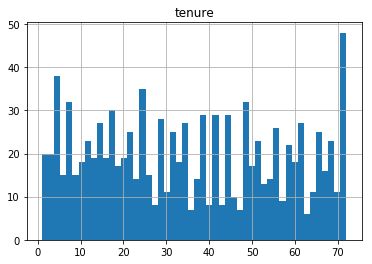

In [18]:
df.hist(column= 'tenure', bins = 50 )

In [8]:
## it gives back the 
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

We need to convert the pandas dataframe into a numpy array 


In [10]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[   2.,   13.,   44.,    1.,    9.,   64.,    4.,    5.,    0.,
           0.,    2.],
       [   3.,   11.,   33.,    1.,    7.,  136.,    5.,    5.,    0.,
           0.,    6.],
       [   3.,   68.,   52.,    1.,   24.,  116.,    1.,   29.,    0.,
           1.,    2.],
       [   2.,   33.,   33.,    0.,   12.,   33.,    2.,    0.,    0.,
           1.,    1.],
       [   2.,   23.,   30.,    1.,    9.,   30.,    1.,    2.,    0.,
           0.,    4.]])

data is on a gaussian distribution so can be transform to be compared each other with `StandarScaler()`

In [11]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

**Out of Sample Accuracy** is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on.

Splitting data into train and test subset

Defining dependent variable  

In [20]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## K nearest neighbor (KNN)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

* `algorithm='auto'` attempts to decide the most appropriate algorithm based on the values passed to `fit()`
* `leaf_size=30` it is the default values it is the values passed to the algorithm. it could affect memory

In [24]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

In [25]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


In binary and multiclass classification, this function is equal to the `jaccard_similarity_score` function.

#### classification with k = 6

In [27]:
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 3, 3, 4, 4])

In [28]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


In [33]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([ 0.3  ,  0.29 ,  0.315,  0.32 ,  0.315,  0.31 ,  0.335,  0.325,
        0.34 ,  0.33 ,  0.315,  0.34 ,  0.33 ,  0.315,  0.34 ,  0.36 ,
        0.355,  0.35 ,  0.345,  0.335,  0.35 ,  0.36 ,  0.37 ,  0.365,
        0.365,  0.365,  0.35 ,  0.36 ,  0.38 ,  0.385,  0.395,  0.395,
        0.38 ,  0.37 ,  0.365,  0.385,  0.395,  0.41 ,  0.395,  0.395,
        0.395,  0.38 ,  0.39 ,  0.375,  0.365,  0.38 ,  0.375,  0.375,
        0.365])

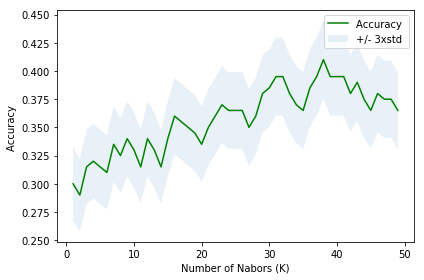

In [34]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [35]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.41 with k= 38
